In [12]:

from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import re
import plotly.express as px


In [7]:
# Répartition géographique des déclarants
geolocator = Nominatim(user_agent="my_user_agent")

taxes = pd.read_csv(config.EXTRACTION_FILE)
taxes = taxes.dropna(subset=['adresse','revenu_fiscal_de_ref'])

taxes['postal_code'] = taxes['adresse'].apply(
    lambda x:re.search(r'[0-9]{5}',x).group(0)[:2] if x != "" else "")

taxes['localisation'] = taxes['postal_code'].apply(
    lambda x:(geolocator.geocode(x+' France').latitude,
    geolocator.geocode(x+' France').longitude) if geolocator.geocode(x+' France') else ())


In [8]:
count_per_area = taxes.groupby(['postal_code','localisation']).agg('count').reset_index()
count_per_area

,postal_code,localisation,Unnamed: 0,id_doc,nom,prenom,adresse,num_fiscal,mtnt_impot,revenu_fiscal_de_ref,nb_parts
0,03100,"(46.343920965742576, 2.5941275596039604)",1,1,1,1,1,1,1,1,1
1,06200,"(43.67991951400966, 7.21034937294686)",1,1,1,1,1,1,1,1,1
2,12000,"(44.3533693705088, 2.572108105787316)",1,1,1,1,1,1,1,1,1
3,17100,"(45.749085251543214, -0.625786249691358)",2,2,2,2,2,2,2,2,2
4,21000,"(47.32602162039587, 5.044862341049914)",1,1,1,1,1,1,1,1,1
5,23000,"(46.1694846633987, 1.8738597366013072)",1,1,1,1,1,1,1,1,1
6,42300,"(46.03398703072626, 4.06130756424581)",2,2,2,2,2,2,2,2,2
7,44120,"(47.170683992145285, -1.4814683448638004)",1,1,1,1,1,1,1,1,1
8,47300,"(44.40285866962025, 0.6984636405063291)",1,1,1,1,1,1,1,1,1
9,59150,"(50.666671085436896, 3.2044113699029126)",1,1,1,1,1,1,1,1,1


In [9]:
lat=np.array([tx[0] for tx in count_per_area['localisation']])
lon=np.array([tx[1] for tx in count_per_area['localisation']])

fig = px.scatter_geo(count_per_area,lat=lat,lon=lon, hover_name="postal_code",color='postal_code',size='nom')
fig.update_layout(title = 'World map', title_x=0.5)
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['03100'], dtype=object),
              'lat': array([46.34392097]),
              'legendgroup': '03100',
              'lon': array([2.59412756]),
              'marker': {'color': '#636efa', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '03100',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['06200'], dtype=object),
              'lat': array([43.67991951]),
              'legendgroup': '06200',
              'lon': array([7.21034937]),
              'marker': {'color': '#EF553B', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '06200',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['12000'], dtype=object),
              'lat': array([44.35336937]),
              'legendgroup': '12000',
              'lon': array([2.57210811]),
              'marker': {'color': '#00cc96', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '12000',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['17100'], dtype=object),
              'lat': array([45.74908525]),
              'legendgroup': '17100',
              'lon': array([-0.62578625]),
              'marker': {'color': '#ab63fa', 'size': array([2]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '17100',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['21000'], dtype=object),
              'lat': array([47.32602162]),
              'legendgroup': '21000',
              'lon': array([5.04486234]),
              'marker': {'color': '#FFA15A', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '21000',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['23000'], dtype=object),
              'lat': array([46.16948466]),
              'legendgroup': '23000',
              'lon': array([1.87385974]),
              'marker': {'color': '#19d3f3', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '23000',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['42300'], dtype=object),
              'lat': array([46.03398703]),
              'legendgroup': '42300',
              'lon': array([4.06130756]),
              'marker': {'color': '#FF6692', 'size': array([2]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '42300',
              'showlegend': True,
              't

In [10]:
# Revenus moyens par département
taxes['revenu_fiscal_de_ref'].astype('int64')
revenus_par_zone = taxes.groupby(['postal_code','revenu_fiscal_de_ref']).agg('mean').reset_index()
revenus_par_zone

/tmp/ipykernel_25097/241965483.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,postal_code,revenu_fiscal_de_ref,Unnamed: 0
0,03100,59893.0,64.0
1,06200,81758.0,26.0
2,12000,93668.0,61.0
3,17100,38543.0,32.0
4,17100,52232.0,30.0
5,21000,74296.0,56.0
6,23000,38049.0,68.0
7,42300,41564.0,12.0
8,42300,79157.0,39.0
9,44120,61470.0,74.0


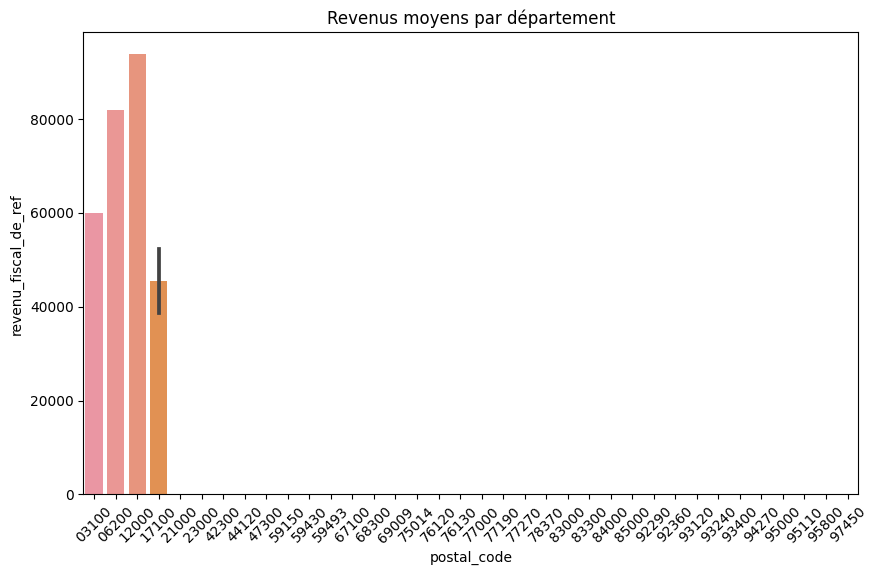

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=revenus_par_zone['postal_code'],y=revenus_par_zone['revenu_fiscal_de_ref'].head(5))
plt.xticks(rotation=45)
plt.title("Revenus moyens par département")
plt.show()